General time series prediction statistics + example data processing for ML time series forecasting

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import os

In [6]:
ts_data = pd.read_csv('data/time_series_60min_singleindex.csv')
print(f"\nDataset shape: {ts_data.shape}")
print(f"Time range: {ts_data['utc_timestamp'].min()} to {ts_data['utc_timestamp'].max()}")
ts_data['utc_timestamp'] = pd.to_datetime(ts_data['utc_timestamp'])
ts_data['cet_cest_timestamp'] = pd.to_datetime(ts_data['cet_cest_timestamp'])
ts_data['hour'] = ts_data['utc_timestamp'].dt.hour
ts_data['day'] = ts_data['utc_timestamp'].dt.day
ts_data['month'] = ts_data['utc_timestamp'].dt.month
ts_data['year'] = ts_data['utc_timestamp'].dt.year
ts_data['day_of_week'] = ts_data['utc_timestamp'].dt.dayofweek


Dataset shape: (50401, 300)
Time range: 2014-12-31T23:00:00Z to 2020-09-30T23:00:00Z


/var/folders/qd/1pjv967d1ylfl4mzr8flbvb00000gn/T/ipykernel_33042/3899464334.py:5: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  ts_data['cet_cest_timestamp'] = pd.to_datetime(ts_data['cet_cest_timestamp'])


In [8]:
print("\n==== Available Data Analysis ====")

# Identify the countries in the dataset
countries = set()
for col in ts_data.columns:
    if '_' in col:
        country = col.split('_')[0]
        countries.add(country)

countries = sorted(list(countries))
print(f"Available countries/regions: {', '.join(countries)}")


==== Available Data Analysis ====
Available countries/regions: AT, BE, BG, CH, CY, CZ, DE, DK, EE, ES, FI, FR, GB, GR, HR, HU, IE, IT, LT, LU, LV, ME, NL, NO, PL, PT, RO, RS, SE, SI, SK, UA, cet, day, utc


In [9]:
# Identify data types (load, solar, wind, etc.)
data_types = set()
for col in ts_data.columns:
    if '_' in col:
        parts = col.split('_')
        if len(parts) > 2:
            data_type = '_'.join(parts[1:-1])  # Extract middle part
            data_types.add(data_type)

data_types = sorted(list(data_types))
print(f"\nAvailable data types: {', '.join(data_types)}")


Available data types: 1_load_actual_entsoe, 1_load_forecast_entsoe, 1_price_day, 1_solar_generation, 1_wind_generation, 1_wind_offshore_generation, 1_wind_onshore_generation, 2_load_actual_entsoe, 2_load_forecast_entsoe, 2_price_day, 2_solar_generation, 2_wind_generation, 2_wind_offshore_generation, 2_wind_onshore_generation, 3_load_actual_entsoe, 3_load_forecast_entsoe, 3_price_day, 3_wind_onshore_generation, 4_load_actual_entsoe, 4_load_forecast_entsoe, 4_price_day, 4_wind_onshore_generation, 50hertz_load_actual_entsoe, 50hertz_load_forecast_entsoe, 50hertz_solar_generation, 50hertz_wind_generation, 50hertz_wind_offshore_generation, 50hertz_wind_onshore_generation, 5_load_actual_entsoe, 5_load_forecast_entsoe, 5_price_day, 5_wind_onshore_generation, BRNN_price_day, BRNN_wind_onshore_generation, CNOR_load_actual_entsoe, CNOR_load_forecast_entsoe, CNOR_price_day, CNOR_solar_generation, CNOR_wind_onshore_generation, CSUD_load_actual_entsoe, CSUD_load_forecast_entsoe, CSUD_price_day, CS

In [11]:
def find_columns_by_type(data, country, data_type):
    """Find columns for a specific country and data type"""
    return [col for col in data.columns if col.startswith(f"{country}_") and data_type in col]
# Select a few representative countries with good data coverage
target_countries = ['DE', 'DK', 'GB_GBN', 'FR']  # Germany, Denmark, Great Britain, France
data_types_for_microgrid = ['load_actual', 'solar_generation_actual', 'wind_generation_actual', 
                           'wind_onshore_generation_actual', 'wind_offshore_generation_actual']

In [13]:
# Select a few representative countries with good data coverage
target_countries = ['DE', 'DK', 'GB_GBN', 'FR']  # Germany, Denmark, Great Britain, France
data_types_for_microgrid = ['load_actual', 'solar_generation_actual', 'wind_generation_actual', 
                           'wind_onshore_generation_actual', 'wind_offshore_generation_actual']

In [15]:
for country in target_countries:
    print(f"\n{country} data availability:")
    for data_type in data_types_for_microgrid:
        cols = find_columns_by_type(ts_data, country, data_type)
        if cols:
            missing = ts_data[cols[0]].isna().sum()
            total = len(ts_data)
            print(f"  - {data_type}: {len(cols)} column(s), {missing} missing values ({missing/total:.1%})")
        else:
            print(f"  - {data_type}: No data available")


DE data availability:
  - load_actual: 6 column(s), 1 missing values (0.0%)
  - solar_generation_actual: 6 column(s), 104 missing values (0.2%)
  - wind_generation_actual: 4 column(s), 75 missing values (0.1%)
  - wind_onshore_generation_actual: 6 column(s), 73 missing values (0.1%)
  - wind_offshore_generation_actual: 4 column(s), 75 missing values (0.1%)

DK data availability:
  - load_actual: 3 column(s), 3 missing values (0.0%)
  - solar_generation_actual: 3 column(s), 12 missing values (0.0%)
  - wind_generation_actual: 3 column(s), 3 missing values (0.0%)
  - wind_onshore_generation_actual: 3 column(s), 3 missing values (0.0%)
  - wind_offshore_generation_actual: 3 column(s), 3 missing values (0.0%)

GB_GBN data availability:
  - load_actual: 1 column(s), 7 missing values (0.0%)
  - solar_generation_actual: 1 column(s), 55 missing values (0.1%)
  - wind_generation_actual: 1 column(s), 41 missing values (0.1%)
  - wind_onshore_generation_actual: 1 column(s), 41 missing values (0.

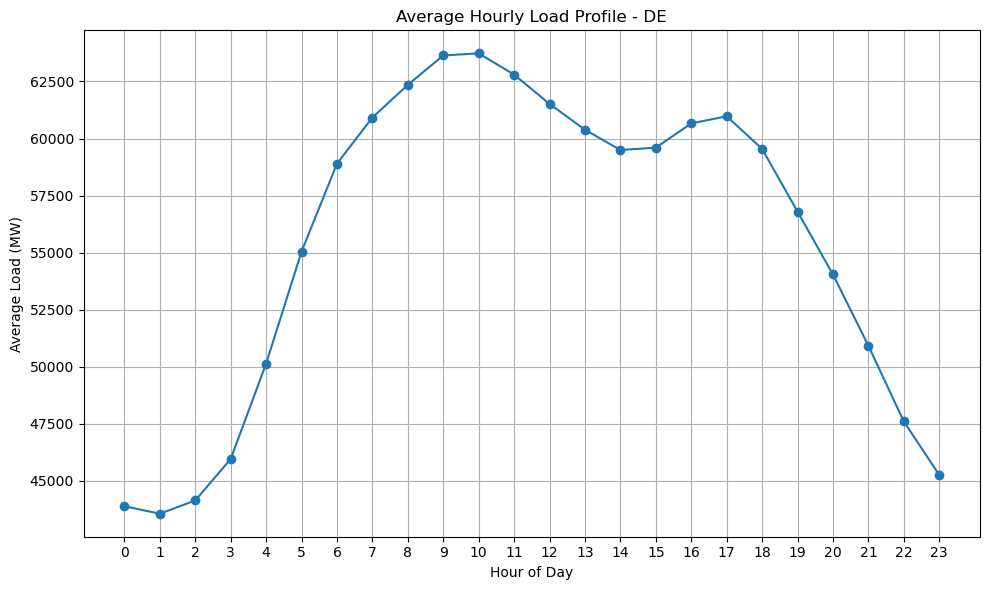

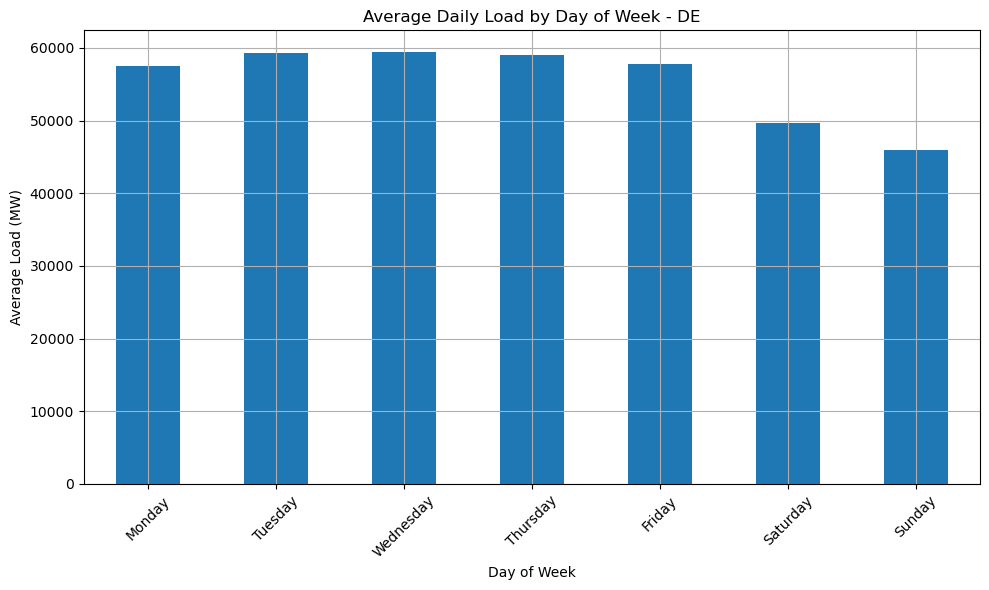

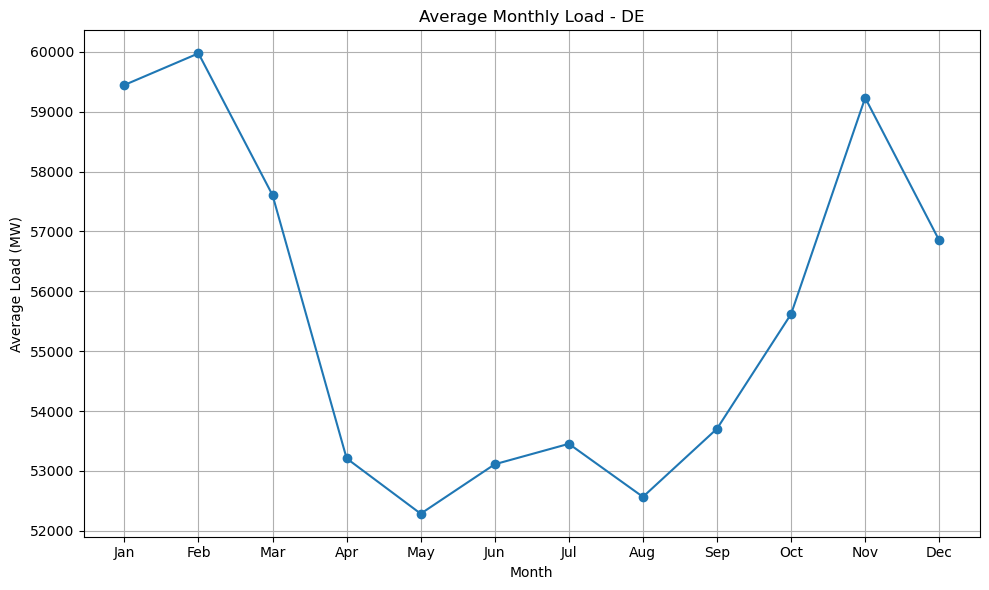

In [16]:
# Select a representative country with good data coverage
analysis_country = 'DE'  # Germany
load_col = f"{analysis_country}_load_actual_entsoe_transparency"

if load_col in ts_data.columns:
    # Daily load profile (by hour of day)
    hourly_load = ts_data.groupby('hour')[load_col].mean()
    
    plt.figure(figsize=(10, 6))
    hourly_load.plot(kind='line', marker='o')
    plt.title(f'Average Hourly Load Profile - {analysis_country}')
    plt.xlabel('Hour of Day')
    plt.ylabel('Average Load (MW)')
    plt.xticks(range(0, 24))
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Weekly load profile
    daily_load = ts_data.groupby('day_of_week')[load_col].mean()
    day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    
    plt.figure(figsize=(10, 6))
    daily_load.plot(kind='bar')
    plt.title(f'Average Daily Load by Day of Week - {analysis_country}')
    plt.xlabel('Day of Week')
    plt.ylabel('Average Load (MW)')
    plt.xticks(range(7), day_names, rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Seasonal load profile
    monthly_load = ts_data.groupby('month')[load_col].mean()
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    plt.figure(figsize=(10, 6))
    monthly_load.plot(kind='line', marker='o')
    plt.title(f'Average Monthly Load - {analysis_country}')
    plt.xlabel('Month')
    plt.ylabel('Average Load (MW)')
    plt.xticks(range(1, 13), month_names)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

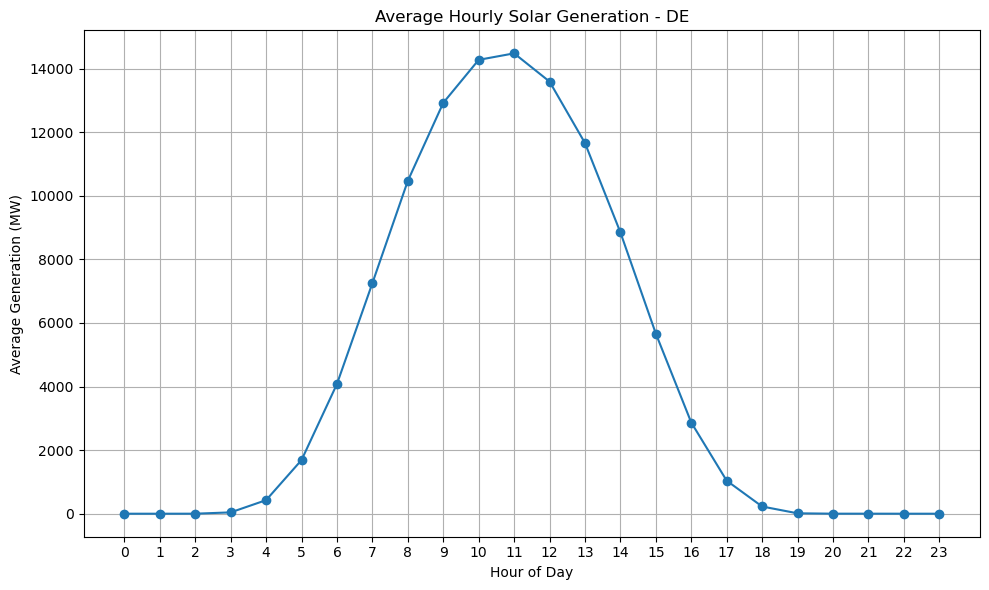

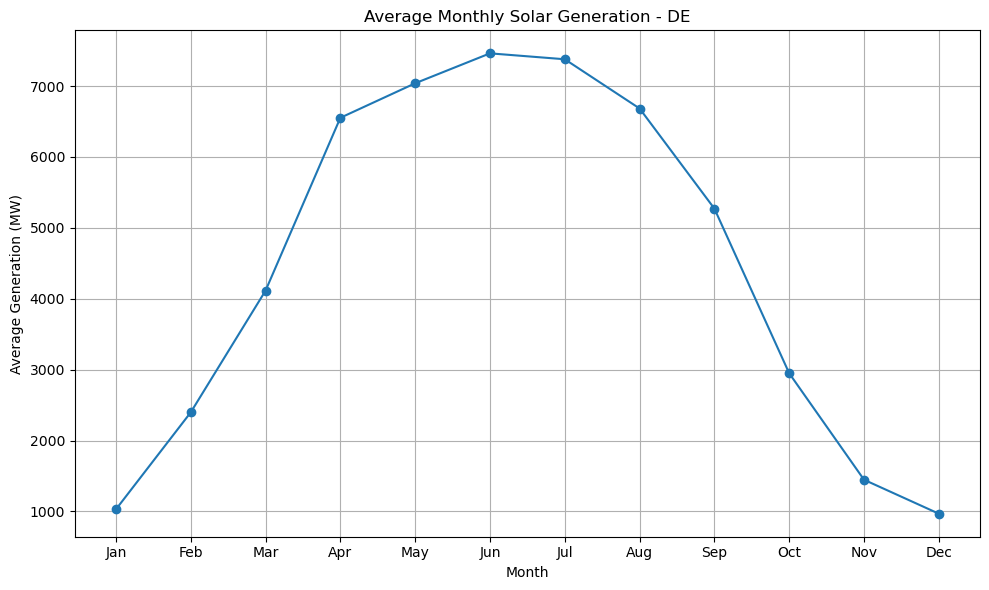

In [17]:
# Solar generation profile analysis
solar_col = f"{analysis_country}_solar_generation_actual"
if solar_col in ts_data.columns:
    # Daily solar profile
    hourly_solar = ts_data.groupby('hour')[solar_col].mean()
    
    plt.figure(figsize=(10, 6))
    hourly_solar.plot(kind='line', marker='o')
    plt.title(f'Average Hourly Solar Generation - {analysis_country}')
    plt.xlabel('Hour of Day')
    plt.ylabel('Average Generation (MW)')
    plt.xticks(range(0, 24))
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Seasonal solar profile
    monthly_solar = ts_data.groupby('month')[solar_col].mean()
    
    plt.figure(figsize=(10, 6))
    monthly_solar.plot(kind='line', marker='o')
    plt.title(f'Average Monthly Solar Generation - {analysis_country}')
    plt.xlabel('Month')
    plt.ylabel('Average Generation (MW)')
    plt.xticks(range(1, 13), month_names)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

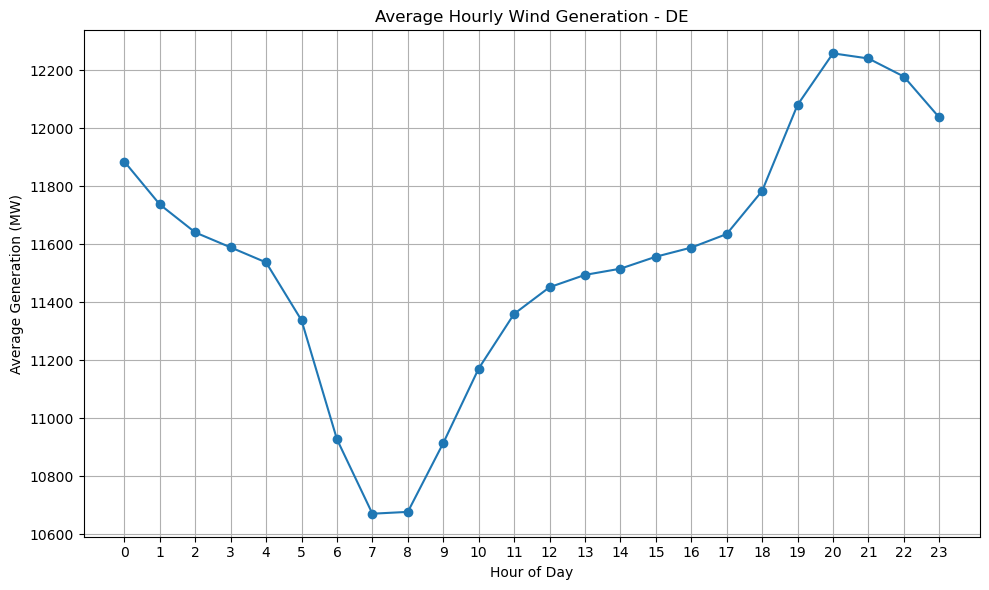

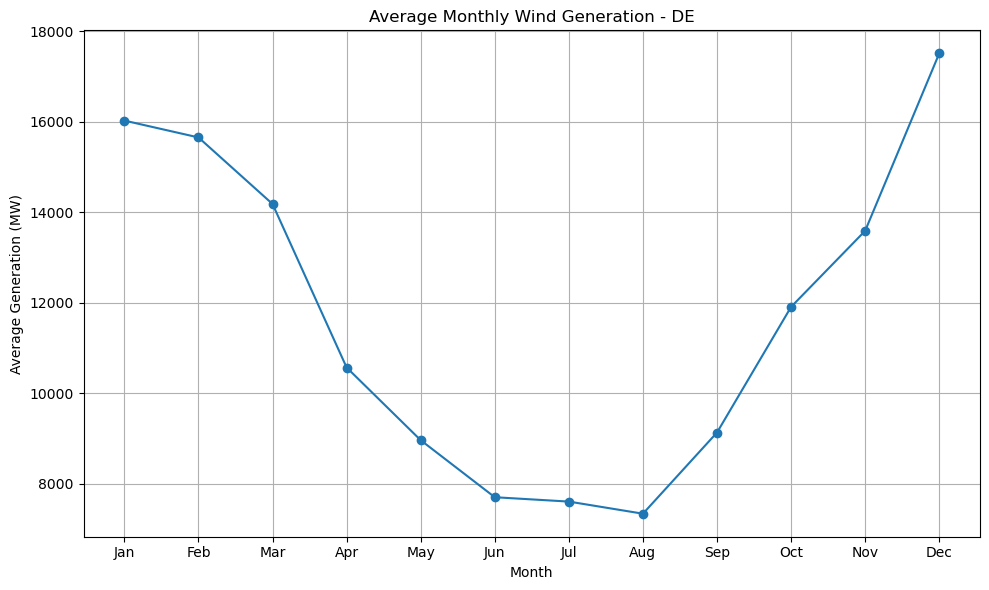

In [18]:
# Wind generation profile analysis
wind_col = f"{analysis_country}_wind_generation_actual"
if wind_col in ts_data.columns:
    # Daily wind profile
    hourly_wind = ts_data.groupby('hour')[wind_col].mean()
    
    plt.figure(figsize=(10, 6))
    hourly_wind.plot(kind='line', marker='o')
    plt.title(f'Average Hourly Wind Generation - {analysis_country}')
    plt.xlabel('Hour of Day')
    plt.ylabel('Average Generation (MW)')
    plt.xticks(range(0, 24))
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Seasonal wind profile
    monthly_wind = ts_data.groupby('month')[wind_col].mean()
    
    plt.figure(figsize=(10, 6))
    monthly_wind.plot(kind='line', marker='o')
    plt.title(f'Average Monthly Wind Generation - {analysis_country}')
    plt.xlabel('Month')
    plt.ylabel('Average Generation (MW)')
    plt.xticks(range(1, 13), month_names)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

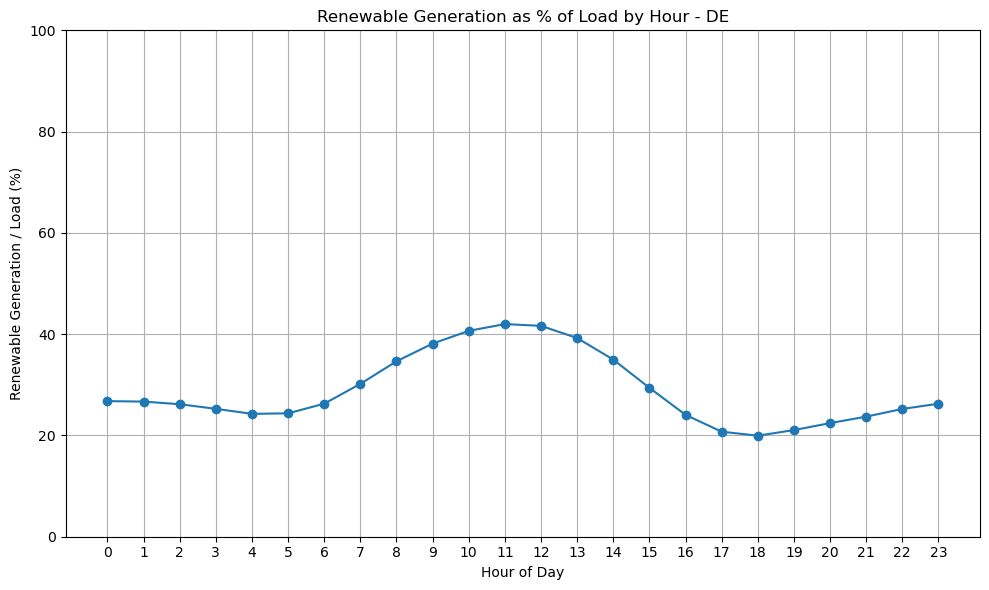

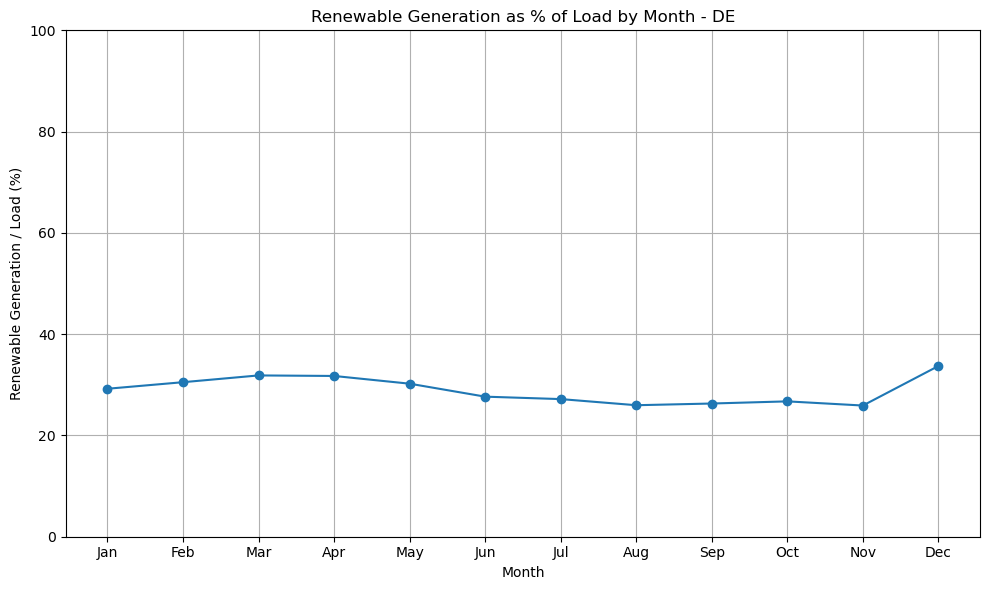

In [19]:
if load_col in ts_data.columns and solar_col in ts_data.columns and wind_col in ts_data.columns:
    # Calculate total renewable generation
    ts_data['renewable_gen'] = ts_data[solar_col].fillna(0) + ts_data[wind_col].fillna(0)
    
    # Calculate renewable generation as percentage of load
    ts_data['renewable_percentage'] = (ts_data['renewable_gen'] / ts_data[load_col]) * 100
    
    # Daily average renewable percentage
    hourly_percentage = ts_data.groupby('hour')['renewable_percentage'].mean()
    
    plt.figure(figsize=(10, 6))
    hourly_percentage.plot(kind='line', marker='o')
    plt.title(f'Renewable Generation as % of Load by Hour - {analysis_country}')
    plt.xlabel('Hour of Day')
    plt.ylabel('Renewable Generation / Load (%)')
    plt.xticks(range(0, 24))
    plt.ylim(0, max(100, hourly_percentage.max() * 1.1))
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Monthly average renewable percentage
    monthly_percentage = ts_data.groupby('month')['renewable_percentage'].mean()
    
    plt.figure(figsize=(10, 6))
    monthly_percentage.plot(kind='line', marker='o')
    plt.title(f'Renewable Generation as % of Load by Month - {analysis_country}')
    plt.xlabel('Month')
    plt.ylabel('Renewable Generation / Load (%)')
    plt.xticks(range(1, 13), month_names)
    plt.ylim(0, max(100, monthly_percentage.max() * 1.1))
    plt.grid(True)
    plt.tight_layout()
    plt.show()


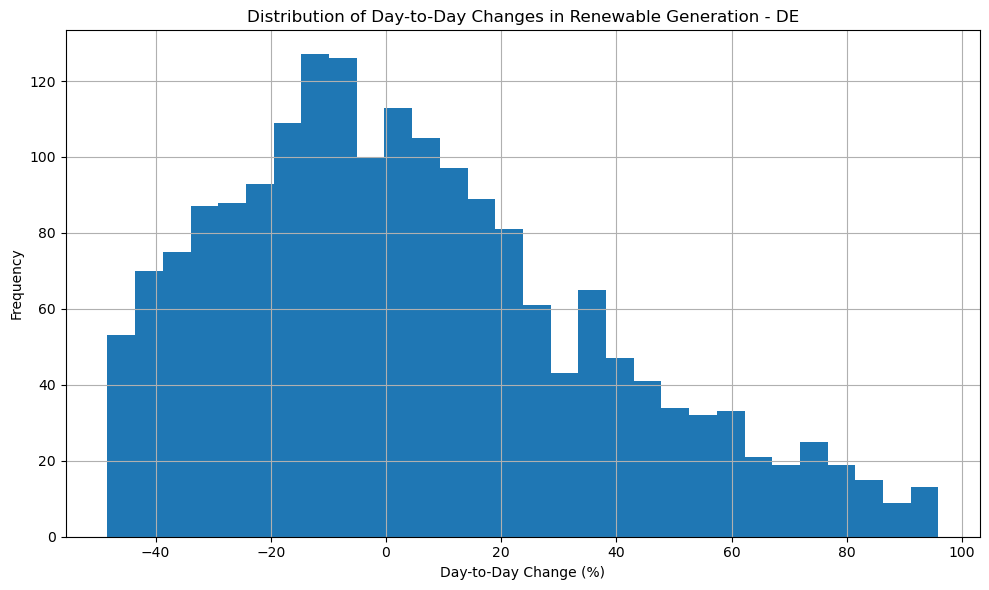

In [23]:
# Calculate day-to-day variability in renewable generation
if 'renewable_gen' in ts_data.columns:
    # Resample to daily data and calculate daily changes
    ts_data['date'] = ts_data['utc_timestamp'].dt.date
    daily_gen = ts_data.groupby('date')['renewable_gen'].mean().reset_index()
    daily_gen['change'] = daily_gen['renewable_gen'].diff()
    daily_gen['pct_change'] = daily_gen['renewable_gen'].pct_change() * 100
    
    # Remove extreme outliers for better visualization
    filtered_changes = daily_gen['pct_change'].dropna()
    q1 = filtered_changes.quantile(0.05)
    q3 = filtered_changes.quantile(0.95)
    filtered_changes = filtered_changes[(filtered_changes >= q1) & (filtered_changes <= q3)]
    
    plt.figure(figsize=(10, 6))
    plt.hist(filtered_changes, bins=30)
    plt.title(f'Distribution of Day-to-Day Changes in Renewable Generation - {analysis_country}')
    plt.xlabel('Day-to-Day Change (%)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


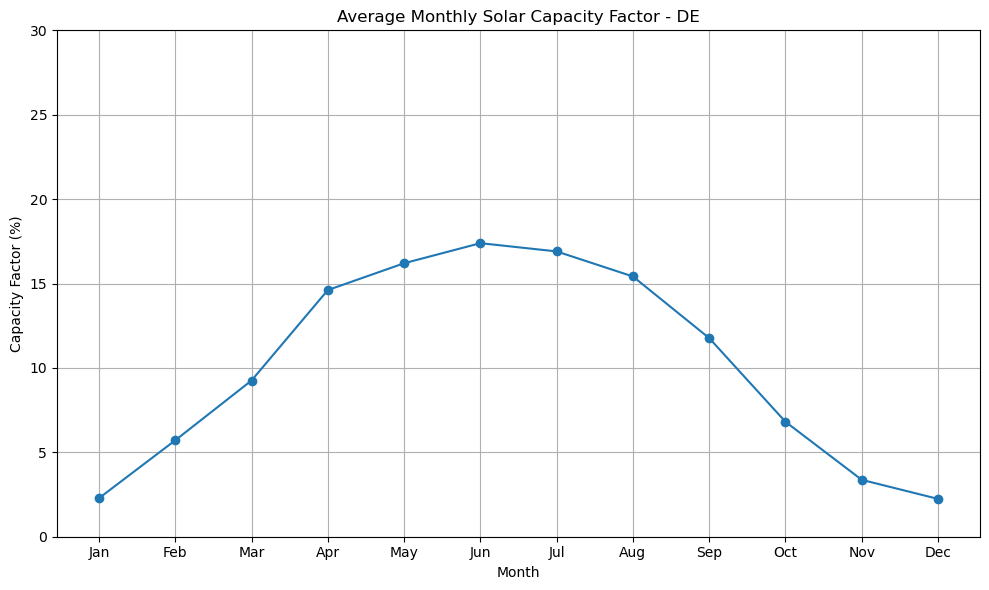

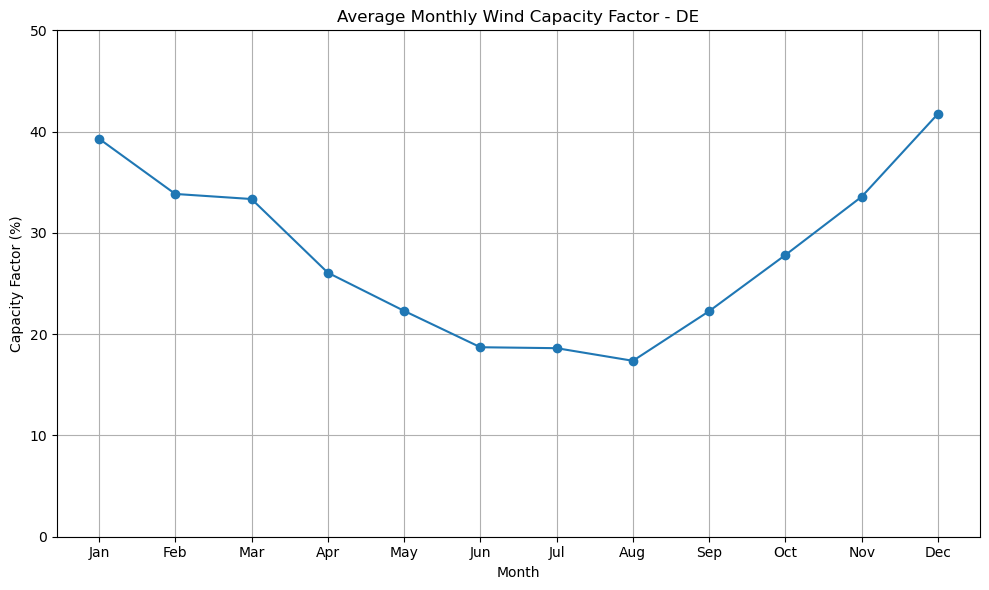

In [26]:
# Check if we have both capacity and generation data
solar_capacity_col = f"{analysis_country}_solar_capacity"
wind_capacity_col = f"{analysis_country}_wind_capacity"
if solar_col in ts_data.columns and solar_capacity_col in ts_data.columns:
    # Calculate solar capacity factor
    ts_data['solar_cf'] = ts_data[solar_col] / ts_data[solar_capacity_col]
    
    # Monthly solar capacity factor
    monthly_solar_cf = ts_data.groupby('month')['solar_cf'].mean() * 100  # Convert to percentage
    
    plt.figure(figsize=(10, 6))
    monthly_solar_cf.plot(kind='line', marker='o')
    plt.title(f'Average Monthly Solar Capacity Factor - {analysis_country}')
    plt.xlabel('Month')
    plt.ylabel('Capacity Factor (%)')
    plt.xticks(range(1, 13), month_names)
    plt.ylim(0, max(30, monthly_solar_cf.max() * 1.1))  # Solar CF typically below 30%
    plt.grid(True)
    plt.tight_layout()
    plt.show()


if wind_col in ts_data.columns and wind_capacity_col in ts_data.columns:
    # Calculate wind capacity factor
    ts_data['wind_cf'] = ts_data[wind_col] / ts_data[wind_capacity_col]
    
    # Monthly wind capacity factor
    monthly_wind_cf = ts_data.groupby('month')['wind_cf'].mean() * 100  # Convert to percentage
    
    plt.figure(figsize=(10, 6))
    monthly_wind_cf.plot(kind='line', marker='o')
    plt.title(f'Average Monthly Wind Capacity Factor - {analysis_country}')
    plt.xlabel('Month')
    plt.ylabel('Capacity Factor (%)')
    plt.xticks(range(1, 13), month_names)
    plt.ylim(0, max(50, monthly_wind_cf.max() * 1.1))  # Wind CF typically below 50%
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Correlation matrix between renewable sources and load:
          Solar      Wind      Load
Solar  1.000000 -0.175053  0.312784
Wind  -0.175053  1.000000  0.103516
Load   0.312784  0.103516  1.000000


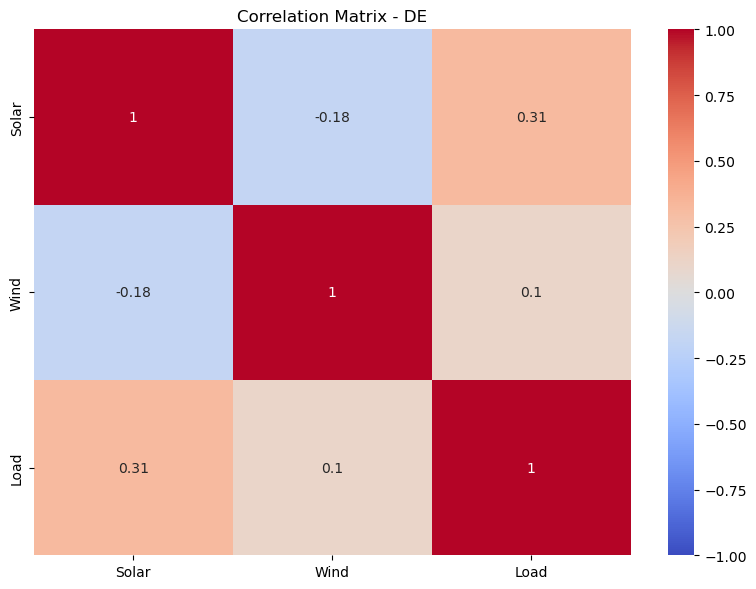

In [29]:
if solar_col in ts_data.columns and wind_col in ts_data.columns and load_col in ts_data.columns:
    # Select relevant columns
    correlation_data = ts_data[[solar_col, wind_col, load_col]].copy()
    correlation_data.columns = ['Solar', 'Wind', 'Load']
    
    # Calculate correlation matrix
    corr_matrix = correlation_data.corr()
    print("\nCorrelation matrix between renewable sources and load:")
    print(corr_matrix)
    
    # Plot correlation matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlation Matrix - {analysis_country}')
    plt.tight_layout()
    plt.show()

In [31]:
if 'renewable_percentage' in ts_data.columns:
    # Find periods with very high renewable penetration
    high_renewable = ts_data[ts_data['renewable_percentage'] > 100].copy()
    print(f"\nPeriods with renewable generation exceeding load: {len(high_renewable)} hours")
    if len(high_renewable) > 0:
        print("Sample of high renewable periods:")
        sample_high = high_renewable.sort_values('renewable_percentage', ascending=False).head(5)
        print(sample_high[['utc_timestamp', solar_col, wind_col, load_col, 'renewable_percentage']])
    
    # Find periods with very low renewable penetration
    low_renewable = ts_data[ts_data['renewable_percentage'] < 10].copy()
    print(f"\nPeriods with very low renewable generation (<10% of load): {len(low_renewable)} hours")
    if len(low_renewable) > 0:
        print("Sample of low renewable periods:")
        sample_low = low_renewable.sort_values('renewable_percentage').head(5)
        print(sample_low[['utc_timestamp', solar_col, wind_col, load_col, 'renewable_percentage']])


Periods with renewable generation exceeding load: 0 hours

Periods with very low renewable generation (<10% of load): 7560 hours
Sample of low renewable periods:
                  utc_timestamp  DE_solar_generation_actual  \
12429 2016-06-01 20:00:00+00:00                         NaN   
12409 2016-06-01 00:00:00+00:00                         NaN   
15990 2016-10-28 05:00:00+00:00                         NaN   
15989 2016-10-28 04:00:00+00:00                         NaN   
15988 2016-10-28 03:00:00+00:00                         NaN   

       DE_wind_generation_actual  DE_load_actual_entsoe_transparency  \
12429                        NaN                             54213.0   
12409                        NaN                             43059.0   
15990                        NaN                             66475.0   
15989                        NaN                             59572.0   
15988                        NaN                             51309.0   

       renewable_percenta

In [33]:
if load_col in ts_data.columns and solar_col in ts_data.columns and wind_col in ts_data.columns:
    # Select and rename columns for clarity
    ml_data = ts_data[['utc_timestamp', 'hour', 'day', 'month', 'year', 'day_of_week', 
                     load_col, solar_col, wind_col]].copy()
    
    ml_data.columns = ['timestamp', 'hour', 'day', 'month', 'year', 'day_of_week', 
                      'load', 'solar_generation', 'wind_generation']
    
    # Handle missing values
    ml_data['solar_generation'] = ml_data['solar_generation'].fillna(0)
    ml_data['wind_generation'] = ml_data['wind_generation'].fillna(0)
    
    # Create features for time-series forecasting
    ml_data['total_generation'] = ml_data['solar_generation'] + ml_data['wind_generation']
    ml_data['load_to_generation_ratio'] = ml_data['load'] / ml_data['total_generation'].replace(0, np.nan)
    
    print("\nSample of prepared data for ML model:")
    print(ml_data.head())
    
    print("\nStatistics of prepared data:")
    print(ml_data.describe())
    
    # Check for missing values in the prepared dataset
    missing_values = ml_data.isnull().sum()
    print("\nMissing values in prepared dataset:")
    print(missing_values[missing_values > 0])


Sample of prepared data for ML model:
                  timestamp  hour  day  month  year  day_of_week     load  \
0 2014-12-31 23:00:00+00:00    23   31     12  2014            2      NaN   
1 2015-01-01 00:00:00+00:00     0    1      1  2015            3  41151.0   
2 2015-01-01 01:00:00+00:00     1    1      1  2015            3  40135.0   
3 2015-01-01 02:00:00+00:00     2    1      1  2015            3  39106.0   
4 2015-01-01 03:00:00+00:00     3    1      1  2015            3  38765.0   

   solar_generation  wind_generation  total_generation  \
0               0.0              0.0               0.0   
1               0.0           8852.0            8852.0   
2               0.0           9054.0            9054.0   
3               0.0           9070.0            9070.0   
4               0.0           9163.0            9163.0   

   load_to_generation_ratio  
0                       NaN  
1                  4.648780  
2                  4.432847  
3                  4.311577  

In [34]:
ml_data

,timestamp,hour,day,month,year,day_of_week,load,solar_generation,wind_generation,total_generation,load_to_generation_ratio
0,2014-12-31 23:00:00+00:00,23,31,12,2014,2,NaN,0.0,0.0,0.0,NaN
1,2015-01-01 00:00:00+00:00,0,1,1,2015,3,41151.0,0.0,8852.0,8852.0,4.648780
2,2015-01-01 01:00:00+00:00,1,1,1,2015,3,40135.0,0.0,9054.0,9054.0,4.432847
3,2015-01-01 02:00:00+00:00,2,1,1,2015,3,39106.0,0.0,9070.0,9070.0,4.311577
4,2015-01-01 03:00:00+00:00,3,1,1,2015,3,38765.0,0.0,9163.0,9163.0,4.230601
...,...,...,...,...,...,...,...,...,...,...,...
50396,2020-09-30 19:00:00+00:00,19,30,9,2020,2,57559.0,0.0,10654.0,10654.0,5.402572
50397,2020-09-30 20:00:00+00:00,20,30,9,2020,2,54108.0,0.0,11836.0,11836.0,4.571477
50398,2020-09-30 21:00:00+00:00,21,30,9,2020,2,49845.0,0.0,12168.0,12168.0,4.096400
50399,2020-09-30 22:00:00+00:00,22,30,9,2020,2,46886.0,0.0,12533.0,12533.0,3.741004
